# EDA dados de comércio eletrônico brasileiro.
    
**Conjunto de dados públicos do comércio eletrônico brasileiro.**
    
Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store . O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 realizados em diversos mercados no Brasil. Seus recursos permitem a visualização de um pedido em múltiplas dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes.
    
**Contexto:**
    
   Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos no mercado brasileiro. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Loja Olist e enviá-los diretamente aos clientes usando os parceiros de logística Olist.

 Depois que um cliente compra o produto na Olist Store, um vendedor é notificado para atender a esse pedido. Assim que o cliente recebe o produto, ou a data estimada de entrega está vencida, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar uma nota sobre a experiência de compra e anotar alguns comentários.

* Veja mais em nosso site: https://olist.com/pt-br/
    
**OBS:**
<font size=3> Estes são dados comerciais reais, porém foram tornados anônimos para não expor os comerciantes e clientes.  
    
**<font size=4.5> Informações sobre os dados:**
    
Os dados estão separadado em 8 arquivos csv, sendo eles:
* Conjunto de dados de clientes (olist_customers_dataset):
    
    Este conjunto de dados contém informações sobre o cliente e sua localização.

    
* Conjunto de dados de itens do pedido (olist_order_items_dataset):
    
    Este conjunto de dados inclui dados sobre os itens adquiridos em cada pedido.

    
* Conjunto de dados de pagamentos (olist_order_payments_dataset):
    
    Este conjunto de dados inclui dados sobre as opções de pagamento de pedidos.
    
    
* Conjunto de dados de avaliações de pedidos (olist_order_reviews_dataset):
    
    Este conjunto de dados inclui dados sobre as avaliações feitas pelos clientes.
    
    Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender a esse pedido. Assim que o cliente recebe o produto, ou a data estimada de entrega está vencida, o cliente recebe uma pesquisa de satisfação por e-mail onde pode dar uma nota sobre a experiência de compra e anotar alguns comentários.
  
    
* Conjunto de dados do pedido (olist_orders_dataset):
    
    Este é o conjunto de dados principal. Em cada pedido, você pode encontrar todas as outras informações.
    
    
* Conjunto de dados de produtos (olist_products_dataset):
    
    Este conjunto de dados inclui dados sobre os produtos vendidos pela Olist.
    
    
* Conjunto de dados de vendedores (olist_sellers_dataset):
    
    Este conjunto de dados inclui dados sobre os vendedores que atenderam aos pedidos feitos na Olist.
    
    
* Conjunto de dados de geolocalização (olist_geolocation_dataset):
    
    Este conjunto de dados contém informações dos CEPs brasileiros e suas coordenadas lat / lng.
    

# Importando libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Importando Dados

In [2]:
pedidos = pd.read_csv('data/olist_orders_dataset.csv') 
clientes = pd.read_csv('data/olist_customers_dataset.csv') 
itens_do_pedido = pd.read_csv('data/olist_order_items_dataset.csv') 
pagamentos_pedidos = pd.read_csv('data/olist_order_payments_dataset.csv')  
vendedores = pd.read_csv('data/olist_sellers_dataset.csv') 
produtos = pd.read_csv('data/olist_products_dataset.csv') 
localizacao = pd.read_csv('data/olist_geolocation_dataset.csv')

## Mesclando todos os dados em uma tabela

* <B>Esquema dos dados
    
Os dados são divididos em vários conjuntos de dados para melhor compreensão e organização. Consulte o seguinte esquema de dados ao trabalhar com ele:

![](https://i.imgur.com/HRhd2Y0.png)

In [3]:
df = pd.merge(pedidos,itens_do_pedido,left_on='order_id',right_on='order_id')
df = df.merge(pagamentos_pedidos,on ='order_id')
df = df.merge(clientes,on ='customer_id')
df = df.merge(produtos,on ='product_id')
df = df.merge(localizacao,  left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

## Visualizando Dados

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.580054,-46.586673,sao paulo,SP


In [5]:
print('{} Linhas e {} colunas'.format(df.shape[0], df.shape[1]))
print('Quantidade de dados nulos:', df.isna().sum().sum())

17954162 Linhas e 35 colunas
Quantidade de dados nulos: 1614472


**Verificando informações do df**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954162 entries, 0 to 17954161
Data columns (total 35 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   order_item_id                  int64  
 9   product_id                     object 
 10  seller_id                      object 
 11  shipping_limit_date            object 
 12  price                          float64
 13  freight_value                  float64
 14  payment_sequential             int64  
 15  payment_type                   object 
 16  payment_installments           int64  
 17  payment_value                  float64
 18  

Aqui já podemos verificar que a base de dados contém 35 colunas e um total de 17954162 itens. 

* Vamos dar uma olhada nas colunas que têm valores nulos e limpá-los, depois vamos verificar todos os tipos de dados e ver quais precisam ser convertidos para análise futuras.

<font size=4> Antes disso vamos começar traduzindo as Colunas.

In [7]:
# Criando um dicionário com as traduções das colunas
colunas_traduzidas = {'order_id': 'id_pedido',
                     'customer_id': 'cliente_id',
                     'order_status': 'status_pedido',
                     'order_purchase_timestamp': 'data_hora_compra',
                     'order_approved_at': 'pedido_aprovado_em',
                     'order_delivered_carrier_date': 'data_entrega_pedido_a_transportadora',
                     'order_delivered_customer_date': 'entregue_ao_cliente_em',
                     'order_estimated_delivery_date': 'previsao_entrega',
                     'order_item_id': 'id_item_pedido',
                     'product_id': 'id_produto',
                     'seller_id': 'id_vendedor',
                     'shipping_limit_date': 'data_limite_envio',
                     'price': 'preco_compra',
                     'freight_value': 'preco_frete',
                     'payment_sequential': 'sequenci_pagamentos',
                     'payment_type': 'tipo_pagamento',
                     'payment_installments': 'numero_parcelas',
                     'payment_value': 'valor_pagamento',
                     'customer_unique_id': 'cliente_id_unico',
                     'customer_zip_code_prefix': 'codigo_postal_cliente',
                     'customer_city': 'cidade_cliente',
                     'customer_state': 'estado_cliente',
                     'product_category_name': 'nome_categoria_produto', 
                     'product_name_lenght': 'comprimento_nome_produto',
                     'product_description_lenght': 'comprimento_descricao_produto',
                     'product_photos_qty': 'qtd_fotos_produto', 
                     'product_weight_g': 'peso_produto_g',
                     'product_length_cm': 'comprimento_produto_cm', 
                     'product_height_cm': 'altura_produto_cm', 
                     'product_width_cm': 'largura_produto_cm'
                     }


In [8]:
# Traduzindo colunas
df.rename(columns=colunas_traduzidas, inplace=True)

## Verificando dados duplicados

* Para verificar se há dados duplicados de pedidos vamos olhar as colunas chaves do nosso df.

In [9]:
df[['id_pedido', 'cliente_id', 'data_hora_compra', 'id_produto']].head()

,id_pedido,cliente_id,data_hora_compra,id_produto
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a


* Como você pode observar temos muitas linhas duplicadas, então podemos eliminar essas linhas mantendo a primeira.

In [10]:
# removendo as linha duplicadas e mantendo sempre a primeira
df = df.drop_duplicates(subset={'id_pedido'}, keep='first', inplace=False)
# resetando o index
df.reset_index(drop=True, inplace=True)

## Verificando dados nulos

In [11]:
# Visualizando as 5 primeiras linhas
df.head()

,id_pedido,cliente_id,status_pedido,data_hora_compra,pedido_aprovado_em,data_entrega_pedido_a_transportadora,entregue_ao_cliente_em,previsao_entrega,id_item_pedido,id_produto,...,qtd_fotos_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149,-23.574809,-46.587471,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04 00:00:00,1,6cc44821f36f3156c782da72dd634e47,...,1.0,1050.0,38.0,10.0,38.0,3149,-23.574809,-46.587471,sao paulo,SP
2,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,1,9abb00920aae319ef9eba674b7d2e6ff,...,1.0,350.0,19.0,14.0,12.0,3149,-23.574809,-46.587471,sao paulo,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3366,-23.565578,-46.534603,sao paulo,SP
4,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20 00:00:00,1,a0b7d5a992ccda646f2d34e418fff5a0,...,2.0,12300.0,40.0,40.0,40.0,3366,-23.565578,-46.534603,sao paulo,SP


In [12]:
df.isnull().sum()

id_pedido                                  0
cliente_id                                 0
status_pedido                              0
data_hora_compra                           0
pedido_aprovado_em                        14
data_entrega_pedido_a_transportadora    1006
entregue_ao_cliente_em                  2180
previsao_entrega                           0
id_item_pedido                             0
id_produto                                 0
id_vendedor                                0
data_limite_envio                          0
preco_compra                               0
preco_frete                                0
sequenci_pagamentos                        0
tipo_pagamento                             0
numero_parcelas                            0
valor_pagamento                            0
cliente_id_unico                           0
codigo_postal_cliente                      0
cidade_cliente                             0
estado_cliente                             0
nome_categ

* Aqui podemos ver que as colunas: 
    - pedido_aprovado_em
    - data_entrega_pedido_a_transportadora
    - entregue_ao_cliente_em
    - nome_categoria_produto 
    - peso_produto_g
    - comprimento_produto_cm
    - altura_produto_cm
    - largura_produto_cm
    
    
contém uma quantidade alta de dados nulos. 
* Vamos verificar o que essa quantidade representa do total da base de dados.

In [13]:
nan_cols = [i for i in df.columns if df[i].isnull().sum() >= 1]
for i in nan_cols:
    print(f"{i}:", "contém", np.round(df[i].isnull().mean() * 100, 2),
          '% dos dados nulos', 'e um total de',
          np.round(df[i].isnull().sum(), 4,), "linhas afetadas")

pedido_aprovado_em: contém 0.01 % dos dados nulos e um total de 14 linhas afetadas
data_entrega_pedido_a_transportadora: contém 1.02 % dos dados nulos e um total de 1006 linhas afetadas
entregue_ao_cliente_em: contém 2.22 % dos dados nulos e um total de 2180 linhas afetadas
nome_categoria_produto: contém 1.43 % dos dados nulos e um total de 1407 linhas afetadas
comprimento_nome_produto: contém 1.43 % dos dados nulos e um total de 1407 linhas afetadas
comprimento_descricao_produto: contém 1.43 % dos dados nulos e um total de 1407 linhas afetadas
qtd_fotos_produto: contém 1.43 % dos dados nulos e um total de 1407 linhas afetadas
peso_produto_g: contém 0.02 % dos dados nulos e um total de 16 linhas afetadas
comprimento_produto_cm: contém 0.02 % dos dados nulos e um total de 16 linhas afetadas
altura_produto_cm: contém 0.02 % dos dados nulos e um total de 16 linhas afetadas
largura_produto_cm: contém 0.02 % dos dados nulos e um total de 16 linhas afetadas


* Como podemos ver, que a quantidade de dados nulos contidos em cadas colunas não respresenta uma grande porcentagem do nosso df. 
* Diante disso irei limpá-los e incluir alguns valores a eles.

### Tratando dados nulos

* Vamos preencher os nulos da 'preco_compra' com a média dos valores da própria coluna.

In [14]:
df['preco_compra'].fillna(df['preco_compra'].mean(), inplace=True)

* Preenchendo valores nulos da coluna 'preco_frete' com os valores médios.

In [15]:
df['preco_frete'].fillna(df['preco_frete'].mean(), inplace=True)

* Atribuindo valores não informado a coluna 'nome_categoria_produto'

In [16]:
df['nome_categoria_produto'].fillna('não informado', inplace=True)

* Atribuindo valores as variáveis de datas que serão usadas ao decorrer das analises

In [17]:
# Preenchendo os dados nulos da coluna 'pedido_aprovado_em' com os dados da data da compra
df["pedido_aprovado_em"].fillna(df["data_hora_compra"], inplace=True)
# preenchendo os dados nulos da coluna 'entregue_ao_cliente_em' com os dados da previsão de entrega
df['entregue_ao_cliente_em'].fillna(df['previsao_entrega'], inplace=True)

* Preenchendo os dados nulos das colunas abaixos com a media dos valores da própria coluna

In [18]:
df['peso_produto_g'].fillna(df['peso_produto_g'].mean(), inplace=True)
df['altura_produto_cm'].fillna(df['altura_produto_cm'].mean(), inplace=True)
df['comprimento_produto_cm'].fillna(df['comprimento_produto_cm'].mean(), inplace=True)
df['largura_produto_cm'].fillna(df['largura_produto_cm'].mean(), inplace=True)

* Removendo colunas que não seram usadas nas analises

In [19]:
colunas = ['data_entrega_pedido_a_transportadora', 
           'comprimento_nome_produto', 
           'comprimento_descricao_produto', 
           'qtd_fotos_produto']

df.drop(columns=colunas,axis=1,inplace=True)

* Verificando os nulos após os tratamentos.

In [20]:
df.isnull().sum()

id_pedido                      0
cliente_id                     0
status_pedido                  0
data_hora_compra               0
pedido_aprovado_em             0
entregue_ao_cliente_em         0
previsao_entrega               0
id_item_pedido                 0
id_produto                     0
id_vendedor                    0
data_limite_envio              0
preco_compra                   0
preco_frete                    0
sequenci_pagamentos            0
tipo_pagamento                 0
numero_parcelas                0
valor_pagamento                0
cliente_id_unico               0
codigo_postal_cliente          0
cidade_cliente                 0
estado_cliente                 0
nome_categoria_produto         0
peso_produto_g                 0
comprimento_produto_cm         0
altura_produto_cm              0
largura_produto_cm             0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocatio

In [21]:
print('{} Linhas e {} colunas'.format(df.shape[0], df.shape[1]))
print('Quantidade de dados nulos:', df.isna().sum().sum())

98391 Linhas e 31 colunas
Quantidade de dados nulos: 0


## Verificando e alterando os tipos dos dados

* Verificando as categorias de cada coluna para realizar as conversões onde for necessário.

In [22]:
df.dtypes

id_pedido                       object
cliente_id                      object
status_pedido                   object
data_hora_compra                object
pedido_aprovado_em              object
entregue_ao_cliente_em          object
previsao_entrega                object
id_item_pedido                   int64
id_produto                      object
id_vendedor                     object
data_limite_envio               object
preco_compra                   float64
preco_frete                    float64
sequenci_pagamentos              int64
tipo_pagamento                  object
numero_parcelas                  int64
valor_pagamento                float64
cliente_id_unico                object
codigo_postal_cliente            int64
cidade_cliente                  object
estado_cliente                  object
nome_categoria_produto          object
peso_produto_g                 float64
comprimento_produto_cm         float64
altura_produto_cm              float64
largura_produto_cm       

* Podemos ver que as colunas de datas foram armazenadas no tipo de dados do 'object', então vamos convertê-los para datetime.
* E as colunas de lat e lng estão com o tipo 'float64' e alteraremos ambas para 'object' para não atrapalhar nossas análises futuras com as features numéricas.

* Alterando tipo das colunas de datas.

In [23]:
colunas_de_datas = ['data_hora_compra','pedido_aprovado_em',
                    'entregue_ao_cliente_em','previsao_entrega',
                    'data_limite_envio']

for colunas in colunas_de_datas:
    df[colunas] = df[colunas].astype('datetime64[ns]')

In [24]:
colunas= ['geolocation_lat', 'geolocation_lng']
for coluna in colunas:
    df[coluna] = df[coluna].astype('object')

# Iniciando Analises

* Separando as features numéricas e time series para analises futuras.

In [25]:
numericas = [x for x in df.columns if df[x].dtype == 'float64']
time_series = [x for x in df.columns if df[x].dtype == 'datetime64[ns]']

In [26]:
df[numericas].describe()

,preco_compra,preco_frete,valor_pagamento,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
count,98391.000000,98391.000000,98391.000000,98391.000000,98391.000000,98391.000000,98391.000000
mean,125.892501,20.180164,157.952002,2103.489830,30.103573,16.489494,23.027487
std,191.214616,15.917385,218.080081,3765.001523,16.120003,13.323902,11.738612
min,0.850000,0.000000,0.010000,0.000000,7.000000,2.000000,6.000000
25%,41.800000,13.250000,60.000000,300.000000,18.000000,8.000000,15.000000
50%,79.000000,16.350000,103.360000,700.000000,25.000000,13.000000,20.000000
75%,139.900000,21.210000,175.080000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,13664.080000,40425.000000,105.000000,105.000000,118.000000


## Analisando Feature Numericas

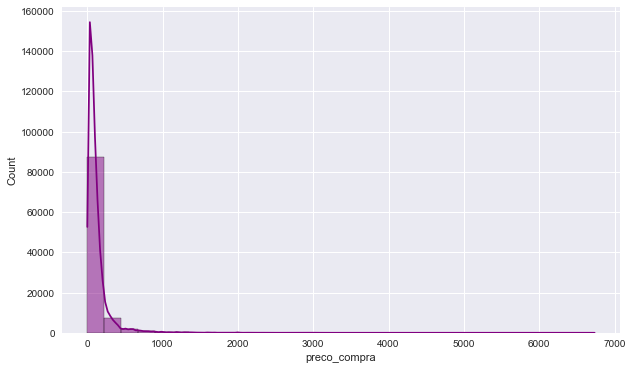

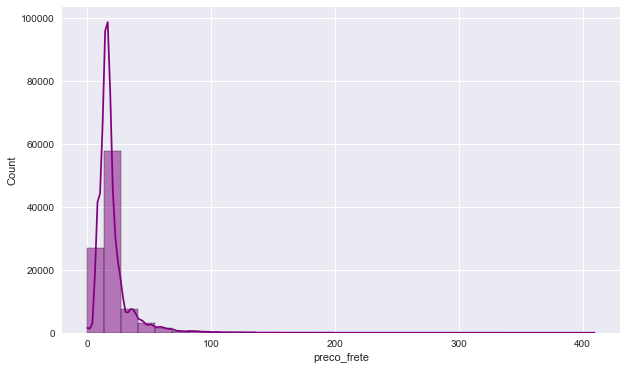

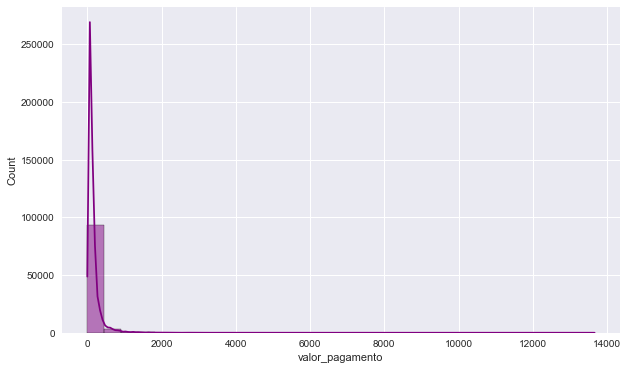

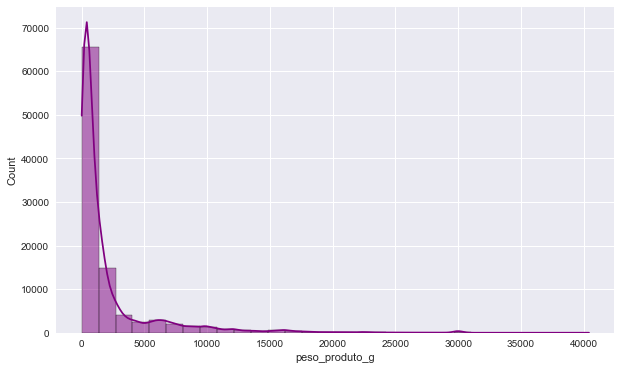

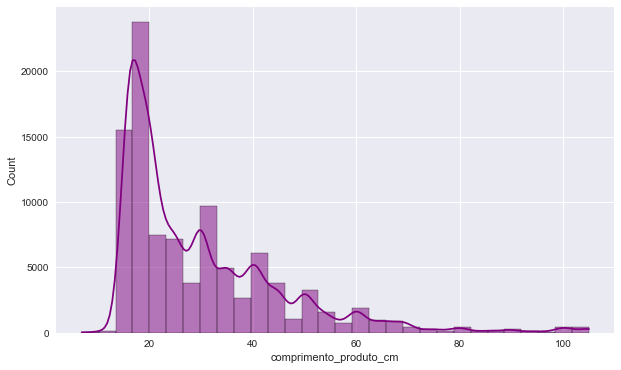

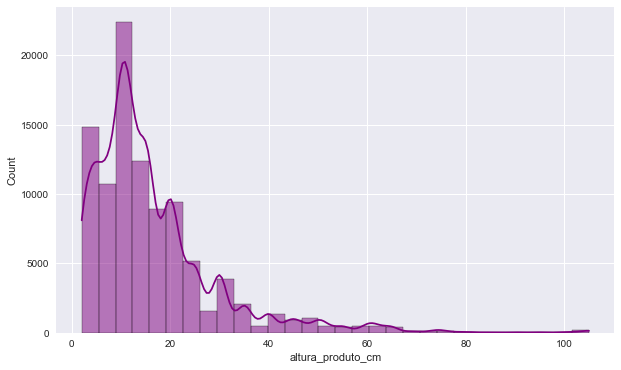

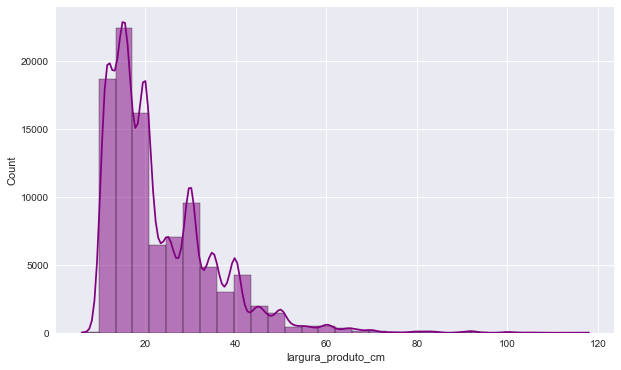

In [27]:
for feature in numericas:
      if df[feature].dtype:    
        plt.figure(figsize=(10, 6))
        plt.style.use('seaborn')
        sns.histplot(df[feature], bins=30, kde=True, color='purple')
        # salvando imagem do gráfico
        plt.savefig(f'imagens_graficos/{feature}.png', bbox_inches='tight')
        plt.show()

<B>Algumas percepções notáveis sobre recursos numéricos:</B>


* Referentes a (preço da compra, preço do frete):
    - Podemos concluir que o preço da compra tem sua maioria <200,00 e o frete <50,00
    
* Sobre dimensões do produto (Peso, altura, largura):
   - Pode-se concluir que a maioria dos produtos tem dimensões pequenas, pois a maioria dos produtos tem altura menor que 20 cm, largura <30 cm, comprimento <60 cm e peso <5000 gms.




## Analisando a variável 'preco_frete'

* Verificando a média do valor do frete por Estado

In [28]:
media_frete_por_estado = df.groupby('estado_cliente')[['preco_frete']].mean()

media_frete_por_estado.sort_values(by='preco_frete',
                                   ascending=False).style.format(
                                       {'preco_frete': 'R$ {:.2f}'})

,preco_frete
estado_cliente,
RO,R$ 42.56
RR,R$ 42.26
PB,R$ 41.82
AC,R$ 41.30
PI,R$ 39.24
MA,R$ 38.24
TO,R$ 37.67
RN,R$ 36.74
SE,R$ 36.62


* Neste resultado podemos verificar o estado de Rondônia tem o frete mais caro com a média de 42,56 reais comparado as todos os outro estados do brasil. E vemos que a cidade de São Paulo tem o valor mais baixo do frete sendo R$ 15,29

* Representação Visual

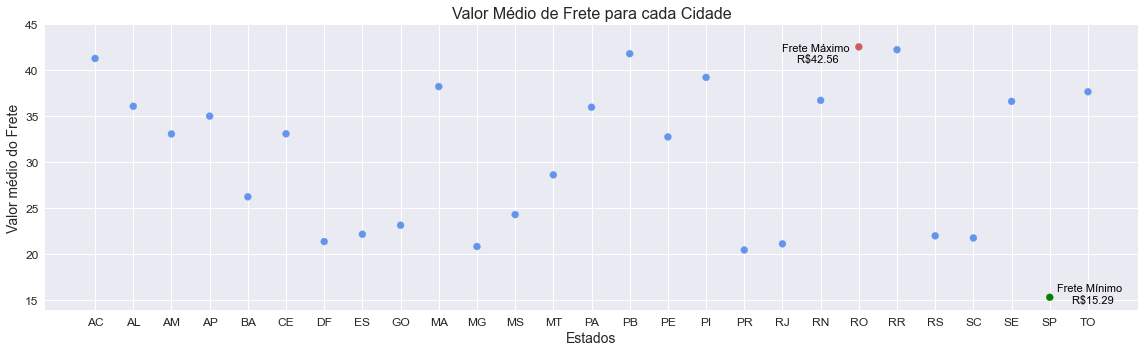

In [29]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(16, 5))

# criando uma função para destacar cores
colors = []
values = media_frete_por_estado['preco_frete'].values.tolist()
for cor in values:
    if cor == max(values):
        colors.append('indianred')
    elif cor == min(values):
        colors.append('green')
    else:
        colors.append('cornflowerblue')
# atribuindo dados ao gráfico
ax.scatter(x=media_frete_por_estado.index,
           y=media_frete_por_estado["preco_frete"],
           c=colors)

# setando titulo do gráfico
ax.set_title("Valor Médio de Frete para cada Cidade", size=16)
# setando titulo eixo x
ax.set_xlabel("Estados", fontsize=14)
# setando titulo eixo y
ax.set_ylabel("Valor médio do Frete", fontsize=14)

# anotações maximo
plt.text(x=18,
         y=43,
         s="Frete Máximo \n     R${}".format(media_frete_por_estado.max()[0].round(2)),
         verticalalignment="top",
         fontsize=11,
         color="k")

# anotações minimo
plt.text(x=25.2,
         y=16.8,
         s="Frete Mínimo\n     R${}".format(media_frete_por_estado.min()[0].round(2)),
         verticalalignment="top",
         fontsize=11,
         color='k')

# configurações dos eixos
plt.yticks(range(15,50, 5), size=12)
plt.xticks(size=12)
# salvando imagem do gráfico
plt.savefig('imagens_graficos/media_frete_por_estado.png', bbox_inches='tight')
#setando a melhor visualização
fig.tight_layout()

### Verificando a correlação do preço do frete com medidas e peso.

* Espera-se que o valor do frete dependa da categoria do pedido, preço, volume e peso: portanto, daremos uma olhada nessas relações nos dados.

In [30]:
# atribuindo dados a uma variável para plotagem
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,id_item_pedido,preco_compra,preco_frete,sequenci_pagamentos,numero_parcelas,valor_pagamento,codigo_postal_cliente,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,geolocation_zip_code_prefix
id_item_pedido,1.000000,-0.026380,-0.022515,-0.002573,0.043920,0.048563,-0.005304,-0.011040,-0.002814,-0.017014,0.003242,-0.005304
preco_compra,-0.026380,1.000000,0.422553,0.005201,0.312609,0.906770,0.042910,0.342988,0.147230,0.233539,0.173219,0.042910
preco_frete,-0.022515,0.422553,1.000000,0.012638,0.207249,0.454424,0.227202,0.614400,0.317089,0.392625,0.330645,0.227202
sequenci_pagamentos,-0.002573,0.005201,0.012638,1.000000,-0.056687,-0.038935,-0.002748,0.013614,0.015548,0.009357,0.009802,-0.002748
numero_parcelas,0.043920,0.312609,0.207249,-0.056687,1.000000,0.323355,0.055434,0.196144,0.124168,0.135680,0.148253,0.055434
valor_pagamento,0.048563,0.906770,0.454424,-0.038935,0.323355,1.000000,0.057927,0.361543,0.163086,0.248354,0.183780,0.057927
codigo_postal_cliente,-0.005304,0.042910,0.227202,-0.002748,0.055434,0.057927,1.000000,0.003071,0.007256,0.007899,-0.009420,1.000000
peso_produto_g,-0.011040,0.342988,0.614400,0.013614,0.196144,0.361543,0.003071,1.000000,0.466472,0.580268,0.513232,0.003071
comprimento_produto_cm,-0.002814,0.147230,0.317089,0.015548,0.124168,0.163086,0.007256,0.466472,1.000000,0.194923,0.548567,0.007256
altura_produto_cm,-0.017014,0.233539,0.392625,0.009357,0.135680,0.248354,0.007899,0.580268,0.194923,1.000000,0.289069,0.007899


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

* Como a amostragem acima podemos avaliar que a variável 'peso_produto_g tem uma correlação linear com o preço do frete, indicando que o aumento do peso influência o valor do frete.


In [31]:
# relação valor do frete vs peso do produto g
round(df['preco_frete'].corr(df['peso_produto_g']), 2)

0.61

* Representação Visual

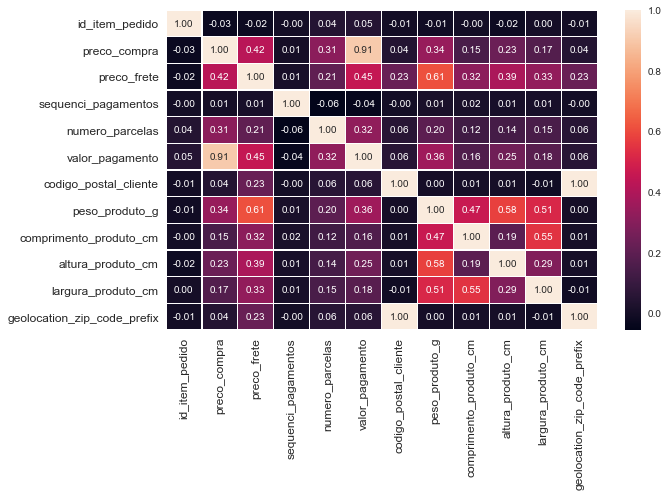

In [32]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 7))
# atribuindo dados ao gráfico
ax = sns.heatmap(corr, annot = True, fmt=".2f" , linewidths=0.4)
# configurações dos eixos
plt.xticks(size=12)
plt.yticks(size=12)
#setando a melhor visualização
fig.tight_layout()

* Esta é a matriz gerada, a qual nos permitirá interpretar a relação entre as variáveis. Nessa matriz podemos ver uma escala de cores de tonalidades de laranja, vermelho e roxo, e uma escala numérica que vai de 1 a -1. O interessante dessa representação gráfica é que além da barra lateral que demonstra a escala numérica do coeficiente e das cores, há também em cada quadrante o valor e a cor referente da relação.

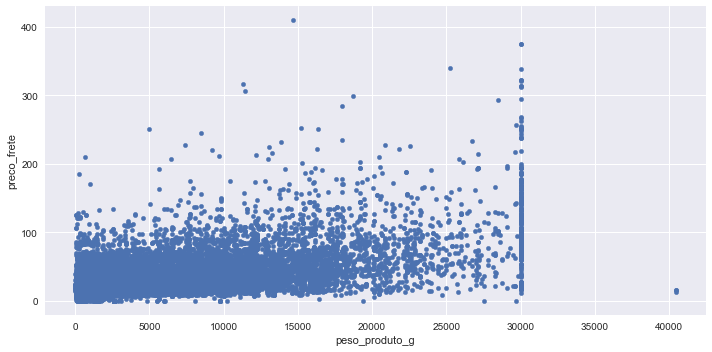

In [33]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 5))
# atribuindo dados ao gráfico
df.plot(kind='scatter', x='peso_produto_g', y='preco_frete', ax=ax)
#setando a melhor visualização
fig.tight_layout()

* Com essa visualização acima podemos confirmar a tese acima de que quanto mais pesado o item maior é o frete.

## Analisando o volume de compras dos clientes por cidades.

In [34]:
# agrupando dados por cidade e contando o total de pedidos.
pagamentos_por_UF = df.groupby('estado_cliente').agg(
    Contagem_por_Estado=('valor_pagamento', 'count'),
    Total_por_Estado=('valor_pagamento', 'sum'),
    Media_por_Estado=('valor_pagamento', 'mean'),
    Mediana_por_Estado=('valor_pagamento','median')).sort_values(by=('Contagem_por_Estado'),
                                                                 ascending=False)
# criando uma varável contendo a representação percentual de cada estado
pagamentos_por_UF['pct'] = pagamentos_por_UF['Total_por_Estado'].apply(
    lambda x: (x / sum(pagamentos_por_UF['Total_por_Estado'])))

# estilizando a visualização do df
pagamentos_por_UF.style.format({
    'Total_por_Estado': 'R$ {:,.2f}',
    'Media_por_Estado': 'R$ {:,.2f}',
    'Mediana_por_Estado': 'R$ {:,.2f}',
    'pct': '{:.1%}'
})


,Contagem_por_Estado,Total_por_Estado,Media_por_Estado,Mediana_por_Estado,pct
estado_cliente,,,,,
SP,41359,"R$ 5,825,466.86",R$ 140.85,R$ 92.50,37.5%
RJ,12749,"R$ 2,089,739.71",R$ 163.91,R$ 109.42,13.4%
MG,11534,"R$ 1,827,492.10",R$ 158.44,R$ 106.78,11.8%
RS,5428,"R$ 870,206.37",R$ 160.32,R$ 106.88,5.6%
PR,4987,"R$ 789,248.83",R$ 158.26,R$ 103.49,5.1%
SC,3612,"R$ 602,251.89",R$ 166.74,R$ 108.94,3.9%
BA,3350,"R$ 595,959.17",R$ 177.90,R$ 116.84,3.8%
ES,2019,"R$ 319,811.20",R$ 158.40,R$ 106.78,2.1%
GO,1998,"R$ 341,860.59",R$ 171.10,R$ 111.42,2.2%


* Como podemos ver acima, 37,50% do total dos consumidores são de SP (São Paulo) com um volume de compras em reais de R$ 5,825,466.86, e com uma grande diferença para o segunda estado que é o RJ (Rio de Janeiro) que representa apenas 13.4% do total de compras feitas.

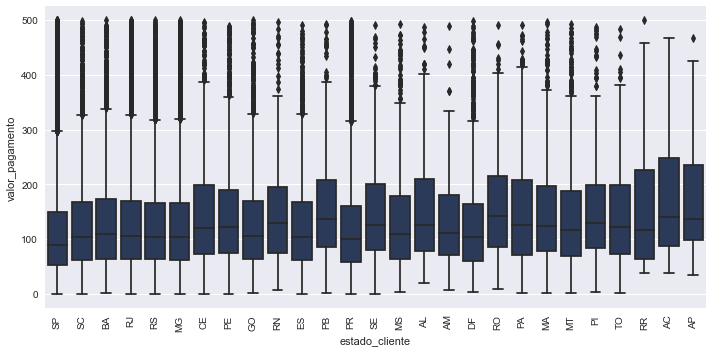

In [35]:
# Boxplots do gasto total por estado
fig = plt.figure(figsize=(10,5))
plt.style.use('seaborn')

sns.boxplot(x="estado_cliente", y="valor_pagamento", 
            data=df[df["valor_pagamento"]<500], color='#253760')

plt.xticks(rotation=90)
fig.tight_layout()

In [36]:
# setando cores
cinza_claro = "#CFCDCE"
cinza_medio = "#A2A1A3"
cinza_escuro = "#787878"
azul_claro = "lightskyblue"
azul_escuro = "#253760"

 * **Representação Visual**

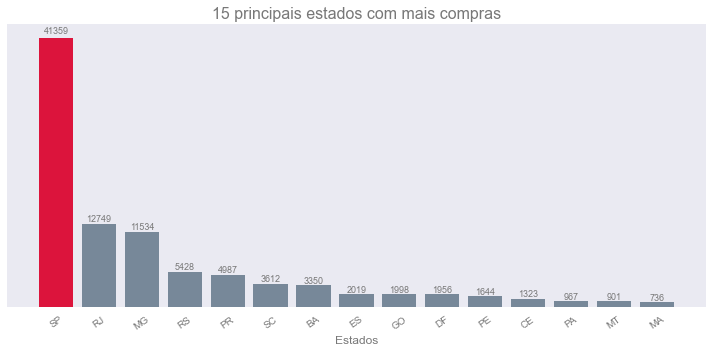

In [37]:
# agrupando dados por cidade e contando o total de pedidos.
vendas_estados = df.groupby('estado_cliente').count().sort_values(
    by='valor_pagamento', ascending=False).reset_index()[:15]
# definindo função para destacar valores
colors = []
values = vendas_estados['valor_pagamento'].values.tolist()
for maior in values:
    if maior == max(values):
        colors.append('crimson')
    else:
        colors.append('lightslategray')
# setando configurações de layout
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn')
# atribuindo dados ao gráfico
ax.bar(data=vendas_estados, x="estado_cliente", height="valor_pagamento", color=colors)
# setando titulo
ax.set_title(
    "15 principais estados com mais compras",
    fontsize=16,
    color=cinza_escuro,
)
# setando titulo eixo x
ax.set_xlabel("Estados", fontsize=12, color=cinza_escuro)
# setando titulo eixo y
ax.set_ylabel("Valor Pagamento")
# configurações de anotações do eixo x
plt.xticks(rotation=35, size=10, color=cinza_escuro)
# removendo grid
plt.grid(False)
# reovendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)

# função de notações das barras
n = range(vendas_estados.shape[0])
s = vendas_estados['valor_pagamento']
for i in range(len(s)):
    ax.annotate("{}".format(int(s[i])),
                xy=(n[i], s[i] * 1.01),
                fontsize=9,
                ha='center',
                va='bottom',
                color=cinza_escuro)

fig.tight_layout()

## Número de pedidos por clientes.
* Veremos a quantidade de pedido que um cliente costuma fazer.

In [38]:
df_  = df.groupby("cliente_id_unico").agg({
    "id_pedido": "nunique"
}).sort_values(by='id_pedido', ascending=False)


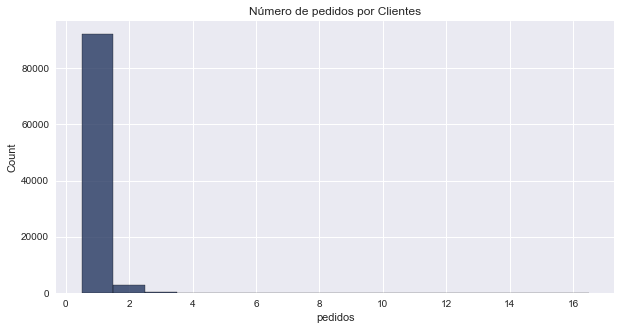

In [39]:
# setando configurações de layout
fig = plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
# atribuindo dados ao grafico
sns.histplot(df_,
             x="id_pedido",
             discrete=True,
             edgecolor="black",
             color=azul_escuro, alpha=0.8)
#configurando titulos
plt.xlabel("pedidos")
plt.title("Número de pedidos por Clientes")
# visualizando
plt.show()

* Podemos ver que a maioria dos clientes fizeram apenas um pedido.

## Verificando quais são os clientes com mais compras

* Lembrando que não temos o nome dos clientes, mas temos o código ID unico de cada cliente.

In [40]:
top_clientes = df.groupby('cliente_id_unico').agg(Pedidos_por_cliente=(
    'cliente_id_unico', 'count')).sort_values(by='Pedidos_por_cliente', ascending=False)[:10]

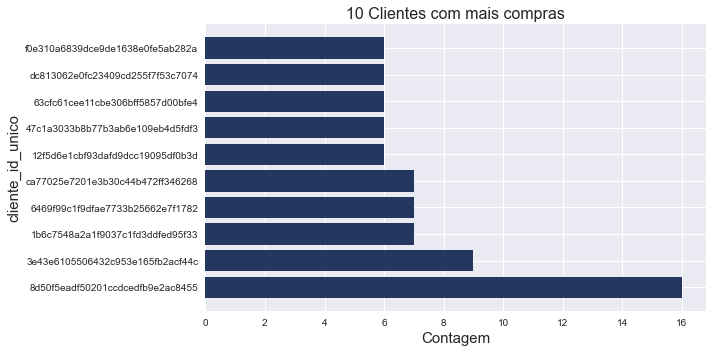

In [41]:
# setando configurações de layout
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn')
# atribuindo dados ao grafico
ax.barh(y=top_clientes.index,
        width=top_clientes['Pedidos_por_cliente'],
        color=azul_escuro)
# configurando titulos
ax.set_title('10 Clientes com mais compras',
              fontsize=16)
ax.set_xlabel('Contagem', fontsize=15)
ax.set_ylabel('cliente_id_unico', fontsize=15)
# setando uma melhor visulização
fig.tight_layout()

* Nessa visualização podemos ver que poucos clientes realizaram mais de uma compra, e tem apenas um cliente que fez mais de um total de 16 pedidos.

## Tipos de pagamento:
   * Agora vamos ver os métodos de pagamento usados pelos clientes.

In [42]:
df['tipo_pagamento'].unique().tolist()

['credit_card', 'boleto', 'voucher', 'debit_card']

* Como podemos ver exsitem 4 tipos de pagementos. 
* Antes de iniciarmos a analise vamos trazudir os tipos dessa coluna.

In [43]:
tipos = {'credit_card': 'Cartão de Crédito', 
         'voucher': 'Voucher',
         'boleto': 'Boleto',
         'debit_card': 'Cartão de Débito' }

df['tipo_pagamento'] = df['tipo_pagamento'].map(tipos)

In [44]:
df['tipo_pagamento'].unique().tolist()

['Cartão de Crédito', 'Boleto', 'Voucher', 'Cartão de Débito']

In [45]:
# agruando e contando dados por tipo de pagamento
df1 = df.groupby('tipo_pagamento').agg(Contagem=(
    'tipo_pagamento', 'count')).sort_values(by='Contagem', ascending=False)
# criando uma variável contendo a representação percentual de cada tipo de pagamento
df1['pct'] = df1.apply(lambda x: (x / ((x.sum()))))
# estilizando a visualização do df
df1.style.format({'pct': '{:.2%}'})

,Contagem,pct
tipo_pagamento,,
Cartão de Crédito,74675,75.90%
Boleto,19559,19.88%
Voucher,2638,2.68%
Cartão de Débito,1519,1.54%


* Visualização gráfica da porcentagem por tipo de pagamento

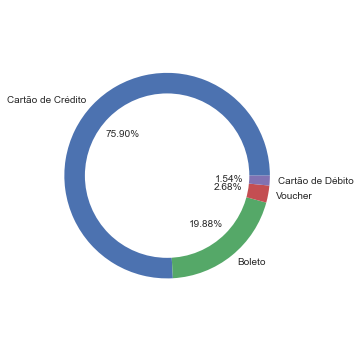

In [46]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(5, 5))
plt.style.use('seaborn')
# filtrando dados
pagamentos = df['tipo_pagamento'].value_counts()
#atribuindo dados ao gráfico
ax.pie(pagamentos,
       labels=pagamentos.index,
       autopct='%.2f%%',
       labeldistance=1.08)

# Configurações de design
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
#setando a melhor visualização
plt.tight_layout()

* <b>Podemos ver que cerca de 94% dos pedidos são feitos por meio de cartão de crédito e boleto.</b>



* Visualização gráfica de quantidade de pagamento por tipo

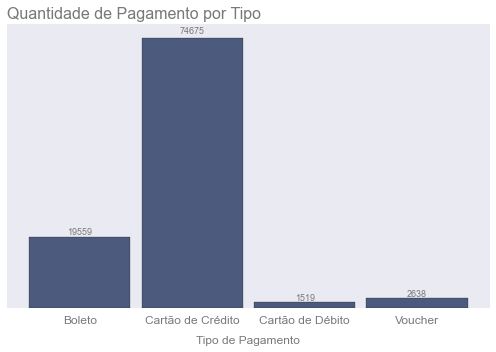

In [47]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('seaborn')
# filtrando dados
df1 = df.groupby(by='tipo_pagamento')[['cliente_id']].count().reset_index()
df1.rename(columns={'cliente_id': 'qtde_pagamentos'}, inplace=True)
#atribuindo dados ao gráfico
ax.bar(data=df1,
       x="tipo_pagamento",
       height="qtde_pagamentos",
       edgecolor="black", color=azul_escuro,
       alpha=0.8, width=0.9)

# configurações de layout ======================================================================
# setando titulo
ax.set_title(
    "Quantidade de Pagamento por Tipo",
    fontsize=16,
    color=cinza_escuro, loc='left')

# setando titulo eixo x
ax.set_xlabel("Tipo de Pagamento", fontsize=12,
              color=cinza_escuro, labelpad=10)
# configurações de anotações do eixo x
plt.xticks(size=12, color=cinza_escuro)
# removendo grid
plt.grid(False)
# reovendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)
# plt.gca().axes.get_xaxis().set_visible(False)

# função de notações das barras
n = range(df1.shape[0])
s = df1['qtde_pagamentos']
for i in range(len(s)):
    ax.annotate("{}".format(int(s[i])),
                xy=(n[i], s[i] * 1.01),
                fontsize=9,
                ha='center',
                va='bottom',
                color=cinza_escuro)
#setando a melhor visualização
fig.tight_layout()

* A maior quantidade de pagamentos foram feitos por cartão de crédito com um total de 74675 pagamento feitos, sendo 75.90% de todos os pagamentos.

* Visualizando a Distribuiçao do tipo de pagamento por estado

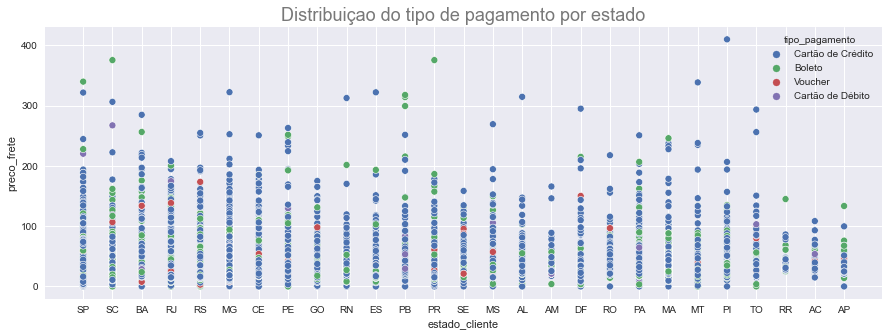

In [48]:
# Configurações do layout
ax = plt.subplots(figsize=(15, 5))
plt.style.use('seaborn')
#atribuindo dados ao gráfico
ax = sns.scatterplot(data=df,
                x='estado_cliente',
                y='preco_frete',
                hue='tipo_pagamento')
# configurações de layout
ax.set_title('Distribuiçao do tipo de pagamento por estado', size=18, color=cinza_escuro)
# salvando imagem do gráfico
plt.savefig('imagens_graficos/scatter_tipo_pagamento.png', bbox_inches='tight')
# visualizando
plt.show()

## Analisando categorias dos produtos

In [49]:
print(
    
    "Contém {} tipos de categorias de produtos compartilhadas entres os clientes."
    .format(len(df['nome_categoria_produto'].unique()))
)

Contém 74 tipos de categorias de produtos compartilhadas entres os clientes.


* Tratando variável 'nome_categoria_produto'

In [50]:
df['nome_categoria_produto'] = df['nome_categoria_produto'].apply(
    lambda x: x.replace("_", " ")).apply(lambda x: x.title())

* Vamos dar uma olhada nas principais categorias de produtos que os clientes mais costumam comprar.

In [51]:
# agrupando e contando os pedidos por categorias
categoria_produto = df.groupby('nome_categoria_produto').agg(
    Contagem_categoria=('nome_categoria_produto', 'count')).sort_values(by='Contagem_categoria',
                                                                        ascending=False)[:10]
# criando uma variável contendo a representação percentual de categoria
categoria_produto['pct_categoria'] = categoria_produto.apply(
    lambda x: (x / x.sum()))
# estilizando a visualização do df
categoria_produto.style.format({
    'pct_categoria': '{:.3%}'
}).background_gradient(cmap='Blues', subset=['pct_categoria'])

,Contagem_categoria,pct_categoria
nome_categoria_produto,,
Cama Mesa Banho,9311,15.015%
Beleza Saude,8767,14.137%
Esporte Lazer,7663,12.357%
Informatica Acessorios,6657,10.735%
Moveis Decoracao,6318,10.188%
Utilidades Domesticas,5815,9.377%
Relogios Presentes,5591,9.016%
Telefonia,4178,6.737%
Automotivo,3867,6.236%


* Como podemos ver na tabela acima, os 5 primeiras categorias com mais compras; Cama mesa e banho, beleza e saúde, esportes e lazer, móveis e acessórios de informática juntas somam mais de de 50% das compras feitas pelos clientes, o que é bastante significativo, pois levando em conta que são 74 categorias no total disponíveis.

* Visualização gráfica das 10 principais categorias de produtos mais Comprados

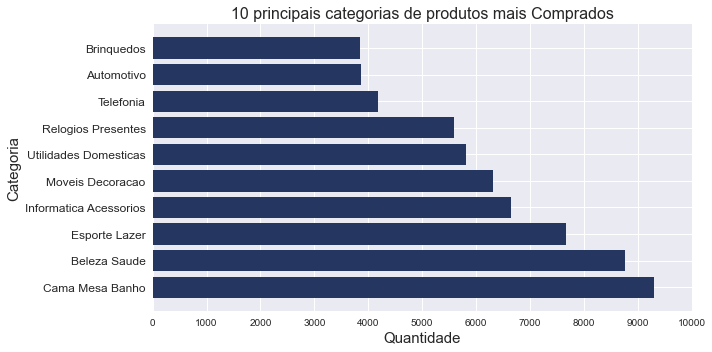

In [52]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn')
# atribuindo dados ao gráfico
ax.barh(y=categoria_produto.index,
        width=categoria_produto['Contagem_categoria'],
        color=azul_escuro)
# configurações de titulos
ax.set_title('10 principais categorias de produtos mais Comprados',
             fontsize=16)

ax.set_xlabel('Quantidade', fontsize=15)
ax.set_ylabel('Categoria', fontsize=15)
# configurações dos eixos
plt.yticks(fontsize=12)
plt.xticks(range(0, 11000, 1000))
#setando a melhor visualização
fig.tight_layout()

- Gasto médio em cada categoria:

In [53]:
preco_medio_categoria = df.groupby("nome_categoria_produto").agg(
    media_por_categoria=('preco_compra','mean')).sort_values(by='media_por_categoria',ascending=False)[:10]

preco_medio_categoria['pct'] = preco_medio_categoria.apply(
    lambda x: (x / x.sum()))


preco_medio_categoria.style.format({
    'media_por_categoria': 'R$ {:.2f}', 
    'pct': '{:.2%}'
}).background_gradient(cmap='Blues', subset=['pct'])

,media_por_categoria,pct
nome_categoria_produto,,
Pcs,R$ 1139.19,27.88%
Portateis Casa Forno E Cafe,R$ 627.82,15.37%
Eletrodomesticos 2,R$ 486.19,11.90%
Agro Industria E Comercio,R$ 352.96,8.64%
Instrumentos Musicais,R$ 296.90,7.27%
Eletroportateis,R$ 292.97,7.17%
Portateis Cozinha E Preparadores De Alimentos,R$ 282.21,6.91%
Construcao Ferramentas Seguranca,R$ 214.37,5.25%
Relogios Presentes,R$ 207.97,5.09%


* Como podemos observar na tabela acima, a categoria <B>computadores (pcs)</B> tem a maior média de gastos, cerca de <B>R$ 1139.19</B>, o que é bastante significativo, lembrando que são 74 categorias no tota.
* Vale destacar que as 3 primeiras categoriras com maisor média de gastos <B>computadores (pcs), (Portateis Casa Forno E Cafe) e (Eletrodomesticos) </B>, juntos somam cerca de <B>54%</B> de todos os gastos médios.

* Visualização gráfica de Gasto médio em por categoria

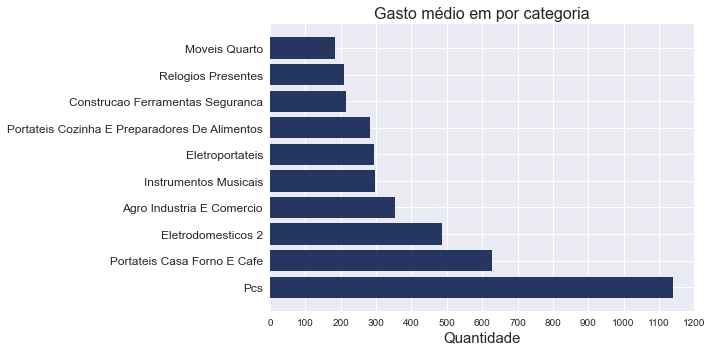

In [54]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 5))
# atribuindo dados ao gráfico
ax.barh(y=preco_medio_categoria.index,
        width=preco_medio_categoria['media_por_categoria'],
        color=azul_escuro)
# configurações de titulos
ax.set_title('Gasto médio em por categoria',
             fontsize=16)
ax.set_xlabel('Quantidade', fontsize=15)
# configurações dos eixos
plt.xticks(range(0,1300, 100))
plt.yticks(fontsize=12)
#setando a melhor visualização
fig.tight_layout()

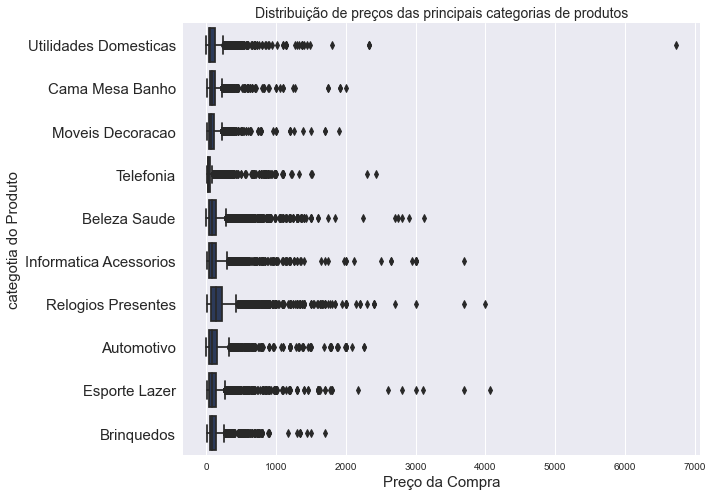

In [55]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 7))
# atribuindo dados ao gráfico
sns.boxplot(data=df[df['nome_categoria_produto'].isin(
    categoria_produto.index)],
            x='preco_compra',
            y='nome_categoria_produto',
            color=azul_escuro)
# configurações de titulos
ax.set_title('Distribuição de preços das principais categorias de produtos',
             fontsize=14)
ax.set_ylabel('categotia do Produto', fontsize=15)
ax.set_xlabel('Preço da Compra', fontsize=15)
# configurações dos eixos
plt.yticks(fontsize=15)
#setando a melhor visualização
fig.tight_layout()

* Conforme figura, há muitos outliers para o mesmo produto, indicando grandes diferenças de preço e que afetam os cálculos médios acima.

## Dias da semanas que mais são feitas as compras

In [56]:
df['dia_da_compra'] = df['data_hora_compra'].dt.day_name()

In [57]:
df['dia_da_compra'].unique().tolist()

['Monday', 'Thursday', 'Tuesday', 'Sunday', 'Wednesday', 'Saturday', 'Friday']

* Traduzindo os dias da semana

In [58]:
dias = {
    'Monday': 'Segunda', 
    'Tuesday': 'Terça', 
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta', 
    'Friday': 'Sexta', 
    'Saturday': 'Sábado', 
    'Sunday': 'Domingo'
}

df['dia_da_compra'] = df['dia_da_compra'].map(dias)

In [59]:
dia_da_compra = df.groupby(['dia_da_compra'])['id_pedido'].agg(
    ['count']).sort_values(by='count', ascending=False)

dia_da_compra.style.background_gradient(cmap='Blues', subset=['count'])

,count
dia_da_compra,
Segunda,16023
Terça,15791
Quarta,15373
Quinta,14603
Sexta,13959
Domingo,11857
Sábado,10785


* Podemos ver que, mais compras online acontecem durante a semana, destacando-se a segunda-feria com mais compras feitas 16023, seguido da terça e quarta com uma diferença pouca.


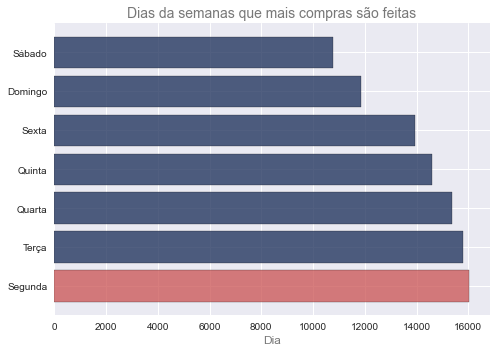

In [60]:
# Configurações do layout
fig, ax = plt.subplots(figsize=(7, 5))
# criando uma função para destacar cores
colors = []
values = dia_da_compra["count"].values
for maior in values:
    if maior == max(values):
        colors.append('indianred')
    else:
        colors.append(azul_escuro)

# atribuindo dados ao gráfico
ax.barh(y=dia_da_compra.index,
        width=dia_da_compra["count"],
        color=colors,
        edgecolor="black",
        alpha=0.8)
# configurações de titulos
ax.set_title('Dias da semanas que mais compras são feitas',
             fontsize=14,
             color=cinza_escuro)
ax.set_xlabel('Dia', fontsize=12, color=cinza_escuro)

#setando a melhor visualização
fig.tight_layout()

## Analisando vendas por ano

* Extraindo apenas mes e ano da data da compra.
* Traduzindo os meses

In [61]:
df['Mes'] = df['data_hora_compra'].dt.month_name()
df['Ano'] = df['data_hora_compra'].dt.year

meses = {'January': 'Janeiro',
         'February': 'Fevereiro',
         'March': 'Março',
         'April': 'Abril',
         'May': 'Maio',
         'June': 'Junho',
         'July': 'Julho', 
         'August': 'Agosto', 
         'September': 'Setembro', 
         'October': 'Outubro', 
         'November': 'Novembro', 
         'December': 'Dezembro'}

df['Mes'] = df['Mes'].map(meses)

* Visualizando compras ao longo de meses em cada ano

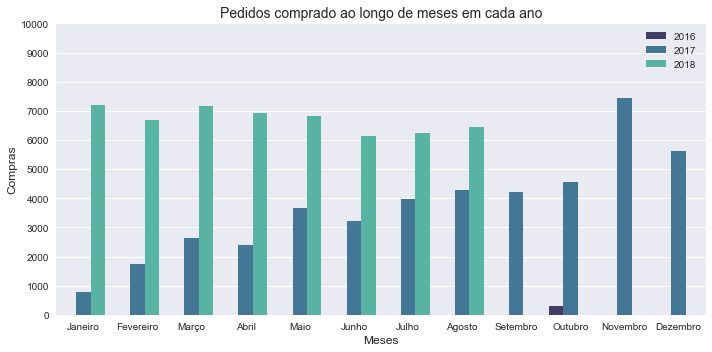

In [62]:
order = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
    'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]
# Configurações do layout
fig, ax = plt.subplots(figsize=(10, 5))
# atribuindo dados ao gráfico
ax = sns.countplot(data=df,
                   x='Mes',
                   hue='Ano',
                   order=order,
                   palette='mako')
# configurações de titulos
ax.set_title('Pedidos comprado ao longo de meses em cada ano', fontsize=14)
ax.set_xlabel('Meses', fontsize=12)
ax.set_ylabel('Compras', fontsize=12)
# configurações dos eixos
ax.set_yticks(range(0, 11000, 1000))
plt.legend(loc='upper right')
#setando a melhor visualização
fig.tight_layout()

* Como foi explicado os dados foram extraidos de 2016 até 2018, porém nem todos os meses estão completos, e podemos ver isso em 2016 que temos apenas um registro em Outubro.
* Podemos destacar que dos meses disponíves em 2018 (8), foram todos superiores ao ano de 2017, exeto em Novembro/2017 que o foi mes com maior volume de compra 7429.

## Analise geográfica de pedidos por Cidade

* Importando libs

In [63]:
from folium.plugins import MarkerCluster
import folium

* Incluindo a base de dados ao nosso df principal

### Mapa Clusterizado

* Os mapas clusterizado costumam ser muito pesados, então Para fins didáticos irei visualizar apenas 70% dos dados de forma aleatória.

In [64]:
df_frac = df.sample(frac=0.7)

In [65]:
# importando libs
from tqdm import tqdm
# setando configurações basicas do mapa
mapa = folium.Map(location=[-12.415429388439524, -49.94279135900545],
                  zoom_start=5,
                  tiles='OpenStreetMap')

# atibuindo nome dos marcadores
cluster = MarkerCluster(name='Vendas')
# atribuindo dados e notações ao mapa
for venda in tqdm(df_frac.itertuples()):
    cluster.add_child(
        folium.Marker(
            location=[venda.geolocation_lat, venda.geolocation_lng],
            popup="<B>Tipo Produto:</B>\n" + str(venda.nome_categoria_produto) +
                  "<B><p>Tipo de Pagamento:</B>\n" + str(venda.tipo_pagamento) +
                  "<B><p>Data da Compra:</B>\n" + str(venda.data_hora_compra),
            icon=folium.Icon(color='blue',
                             prefix='fa',
                             icon='fa-shopping-cart')))

# adicionando cluster criando acima ao mapa
mapa.add_child(cluster)
# adicionando controle dos mapas
folium.LayerControl().add_to(mapa)
# salvar o mapa
mapa.save('mapas_olist/Olist_vendas.html')

68874it [00:14, 4632.61it/s]


### Mapa Choropleth

In [322]:
# imporatndo dados
brasil = pd.read_csv('data/UF.csv', sep=';', encoding='latin1')
# fitrando dados a partir da variável "pagamentos_por_UF"
vendas_estados = pagamentos_por_UF[[
    'Contagem_por_Estado'
]].sort_values(by='estado_cliente').reset_index()
# criando uma coluna com escala Logarítmica de Pedidos por Estados para uma melhor visualização do mapa
vendas_estados['log_Contagem_por_Estado'] = np.log(
    vendas_estados['Contagem_por_Estado'])
# mesclando df com a base de dados contendo as coordenadas
vendas_estados = vendas_estados.merge(brasil,
                                      left_on='estado_cliente',
                                      right_on='UF',
                                      how='left')

In [323]:
# visualizando resultado
vendas_estados

,estado_cliente,Contagem_por_Estado,log_Contagem_por_Estado,Estados,UF,latitude,longitude
0,AC,81,4.394449,Acre,AC,-8.77,-70.55
1,AL,410,6.016157,Alagoas,AL,-9.62,-36.82
2,AM,147,4.990433,Amapá,AM,-3.47,-65.10
3,AP,68,4.219508,Amazonas,AP,1.41,-51.77
4,BA,3350,8.116716,Bahia,BA,-13.29,-41.71
5,CE,1323,7.187657,Ceará,CE,-5.20,-39.53
6,DF,1956,7.578657,Distrito Federal,DF,-15.83,-47.86
7,ES,2019,7.610358,Espírito Santo,ES,-19.19,-40.34
8,GO,1998,7.599902,Goiás,GO,-15.98,-49.86
9,MA,736,6.601230,Maranhão,MA,-5.42,-45.44


* Carregando arquivo json com as localizações de cada estado para o preenchemento do mapa

In [325]:
import json
with open("data/br_states.json", encoding='utf-8') as arquivo:
    geo_json_data = json.load(arquivo)

* Vizualizando Geo Gráfico

In [327]:
# setando configurações basicas do mapa ( localização inicial, zoom e tipo de mapa)
mapa = folium.Map([-12.415429388439524, -49.94279135900545],
                  zoom_start=4,
                  tiles='OpenStreetMap')

# atribuindo dados ao mapa
folium.Choropleth(
    geo_data=geo_json_data,
    key_on="feature.id",
    name='Brasil',
    data=vendas_estados,
    columns=['estado_cliente', 'log_Contagem_por_Estado'],
    fill_color='Reds',
    fill_opacity=0.9,
    line_color= 'white',
    line_opacity=0.8,
    show= True,
    legend_name= "Escala Logarítmica de Pedidos por Estados"
).add_to(mapa)

# atribuindo a vizualização do nome e valores de cada estado
for venda in vendas_estados.itertuples():
    folium.Circle(location=[venda.latitude, venda.longitude],
                  tooltip="<li><B>Estado: </B>" + str(venda.Estados) +
                          "<li><B>Total Pedidos: </B>" + str(venda.Contagem_por_Estado),
                  color='white').add_to(mapa)


# salvar o mapa
mapa.save('mapas_olist/Olist_vendas_choropleth.html')

# Analisando Comentários Sobre os Pedidos

* Importando Dados com os Reviews

In [68]:
Reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')

* Visualizando os 5 primeiros registros 

In [69]:
Reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


* Filtrando apenas as culunas que serão analisadas

In [70]:
Reviews = Reviews[['review_score','review_comment_message']]
Reviews.head()

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...


* Tratando dados nulos

In [71]:
nan_cols = [i for i in Reviews.columns if Reviews[i].isnull().sum() >= 1]
for i in nan_cols:
    print(f"{i}:", "contém", np.round(Reviews[i].isnull().mean() * 100, 2),
          '% dos dados nulos', 'e um total de',
          np.round(Reviews[i].isnull().sum(), 4,), "linhas afetadas")
    print()
    print(f'Número de linha sem comentários : {Reviews[i].isnull().sum()}')
    print(f'Número de linha com comentários: {len(Reviews[i])-Reviews[i].isnull().sum()}')

review_comment_message: contém 58.25 % dos dados nulos e um total de 58247 linhas afetadas

Número de linha sem comentários : 58247
Número de linha com comentários: 41753


* Removendo dados nulos

In [72]:
Reviews.dropna(inplace=True)

* Visualizando alguns detalhes estatísticos básicos como percentil, média, padrão etc.

In [73]:
Reviews.describe()

,review_score
count,41753.000000
mean,3.640409
std,1.626383
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


## Verificando a Distribuição das Avaliações

* Representação Visual da Distribuição das Avaliações

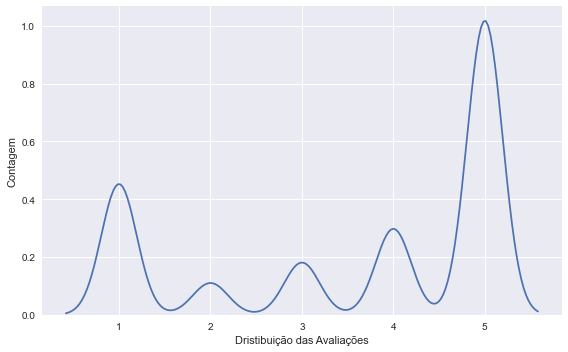

In [74]:
# configurando layout
fig, ax = plt.subplots(figsize=(8, 5))
# filtrando dados 
review_score = Reviews.groupby('review_score').count()
# atribuindo dados ao gráfico
ax= sns.kdeplot(Reviews['review_score'])
# configurando titulos
ax.set_ylabel('Contagem')
ax.set_xlabel('Dristibuição das Avaliações')
# setando uma melhor visualização
fig.tight_layout()

* Podemos ver que os dados estão concentrados em torno da avaliação de 5 estrelas e da avaliação de 1 estrela.
   <p>O que nos leva a presumir que, ou o cliente gostou muito do atendimento ou ele odiou e colocou a menor nota disponível.
    


## Classificando Dados

<p> Para essa analise irei classificar oa avaliações por sentimento onde (< 3 = 'neg') & (> 3 = 'pos') 

<B>

In [75]:
def sentiment(x):
  if x< 3:
    return "neg"
  return "pos"

Reviews['sentimento'] = Reviews['review_score'].map(lambda c : sentiment(c))

In [76]:
Reviews.sample(5, random_state=42)

,review_score,review_comment_message,sentimento
1051,1,"ABRI PROTOCOLO PARA DEVOLUÇÃO, PRODUTO DE BAIX...",neg
83408,1,Quero o valor de volta,neg
37153,3,"Iria comprar mais de voces, mais vi que quanto...",pos
1434,3,rapidez na entrega.,pos
8457,1,Produto veio com defeito,neg


In [77]:
sentimento = Reviews.groupby("sentimento").agg(Contagem=('sentimento', 'count'))

sentimento['pct'] = sentimento.apply(lambda x: (x / x.sum()))

sentimento.style.format({'pct': '{:.2%}'})

,Contagem,pct
sentimento,,
neg,11408,27.32%
pos,30345,72.68%


* Podemos ver que a porcentagem de clientes satisfeitos é bem alta cerca de <B>72.68%</B>, que confirma nossa analise sobre a distribuição das avaliações, onde a quantidade de avaliações com 5 estrelas tem o maior peso.

* Representação Visual da Distribuição de sentimentos

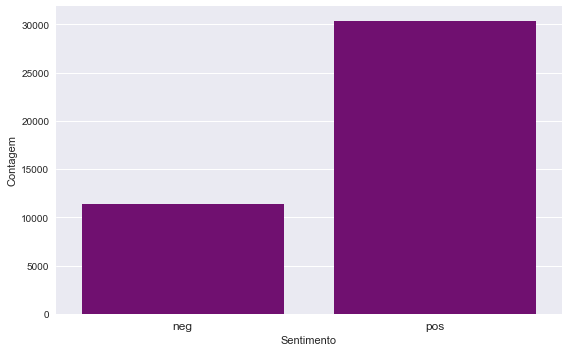

In [78]:
# configurando layout
fig, ax = plt.subplots(figsize=(8, 5))
# # atribuindo dados ao gráfico
ax = sns.barplot(x=sentimento.index,
                 y=sentimento['Contagem'], color='purple')
# # configurações de titulos
ax.set_ylabel('Contagem')
ax.set_xlabel('Sentimento')
# configurações dos eixos
plt.xticks(size=12)
# setando a melhor visualização
fig.tight_layout()

## Tratando os textos

### Visualizando WordCloud

* Importando libs

In [79]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nltk.tokenize import word_tokenize
import nltk

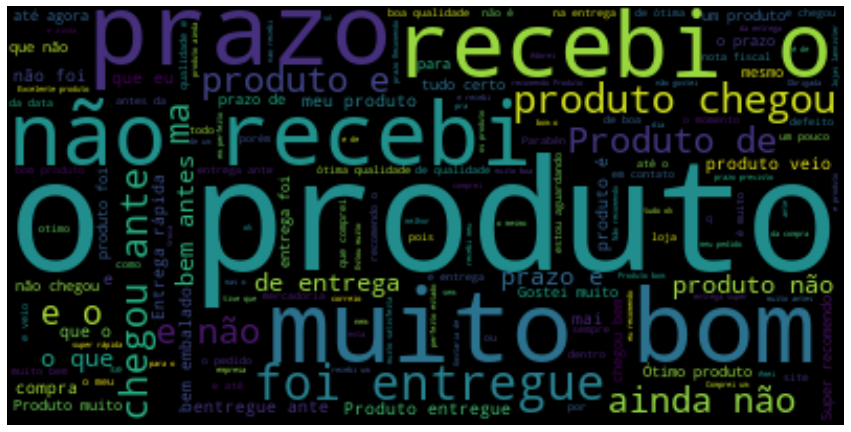

In [80]:
# Transformando coluna preprocessed em uma string unica
text = " ".join([x for x in Reviews['review_comment_message']])

# atribuindo dados a plotagem 
wordcloud = WordCloud(
    background_color="black",
    max_font_size=110,
    max_words=1000,
    collocations=True
).generate(text)

# configurando layout
plt.figure(figsize=[15, 15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# visualizando
plt.show()

* Wordcloud ou nuvem de palavras é uma imagem que contém várias palavras, que podem ser feitas a partir de textos e o tamanho de cada palavra mostrada está relacionado com a frequência que a mesma aparece no texto.

* Como podemos ver a nossa nuvem de palavras está bem suja com muitas "Stop Words" que são As Stop Words são palavras que não necessitam ser indexadas, por possui pouco significado, tais como preposições, artigos, conjunções e outros.
<p>
<P> E para tornar melhor a analise irei fazer um tartamento para refinar a vizualização da nossa Wordcloud.

### Stop Words - removendo o que não agrega

In [81]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))
print(stopwords)

{'está', 'um', 'na', 'pelos', 'esta', 'aquela', 'lhe', 'estas', 'teriam', 'com', 'era', 'estavam', 'eles', 'tuas', 'tém', 'tinha', 'estivera', 'estávamos', 'estivessem', 'houvéssemos', 'sejam', 'aquele', 'seriam', 'tivermos', 'elas', 'pelas', 'se', 'estejamos', 'éramos', 'tivéramos', 'mesmo', 'esse', 'sem', 'tu', 'mas', 'da', 'deles', 'houverão', 'muito', 'também', 'houver', 'eu', 'tive', 'entre', 'estejam', 'que', 'tiverem', 'houveria', 'houveram', 'até', 'depois', 'somos', 'e', 'tivesse', 'às', 'forem', 'tenhamos', 'para', 'quando', 'os', 'nossa', 'estive', 'aquelas', 'é', 'estivesse', 'nas', 'for', 'será', 'fosse', 'fôssemos', 'vocês', 'seria', 'haja', 'o', 'num', 'houveremos', 'estes', 'estivermos', 'tivessem', 'terá', 'meu', 'estava', 'houve', 'tem', 'estivemos', 'dos', 'aquilo', 'esteja', 'teus', 'aqueles', 'estou', 'temos', 'seu', 'nem', 'estiver', 'houveriam', 'estivéssemos', 'nos', 'minhas', 'minha', 'nosso', 'foram', 'esteve', 'te', 'eram', 'tenho', 'tínhamos', 'terão', 'essa

* Tokenização e remoção das stopwords

* Para isso irei usar a biblioteca NLTK e o método **tokenizetoken_space.tokenize()**
<p>
    
    
https://www.nltk.org/api/nltk.tokenize.html

In [82]:
# importando libs
from nltk import tokenize
# setando stopwords
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

# criando list apara ser populada
words_processed = list()
# inicinando o tratamento
for word in Reviews['review_comment_message']:
    words = list()
    word = word.lower()
    token_space = tokenize.WhitespaceTokenizer()
    word_tokens = token_space.tokenize(word)
    for wd in word_tokens:
        if wd not in stopwords:
            words.append(wd)
    words_processed.append(" ".join(words))

# Atribuindo os dados tratados a uma nova coluna do df
Reviews['preprocessed'] = words_processed

* Visualizando comparação do tratamento

In [83]:
Reviews[['review_comment_message', 'preprocessed']][:5]

,review_comment_message,preprocessed
3,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. site marca aparelho impres...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","pouco ,travando...pelo valor ta boa."
15,"Vendedor confiável, produto ok e entrega antes...","vendedor confiável, produto ok entrega antes p..."


### Retirando pontuação

* Para isso irei popular a nossa lista de stopwords com as pontuações do método punctuation da biblioteca string e irei aplicar novamente na coluna preprocessed.


In [84]:
# importando libs
from string import punctuation

# atribuindo pontuações a uma nova lista
punctuations = list()
for ponto in punctuation:
    punctuations.append(ponto)
# populando a nossa variável stopwords com as novas pontuações   
stopwords.update(punctuations)   
# setando método 
token_punctuation = tokenize.WordPunctTokenizer()
# inicinando o tratamento   
words_processed = list()
for word in Reviews['preprocessed']:
    words = list()
    word_tokens = token_punctuation.tokenize(word)
    for wd in word_tokens:
        if wd not in stopwords:
            words.append(wd)
    words_processed.append(" ".join(words))
    
# Atribuindo os dados tratados a uma nova coluna do df   
Reviews['preprocessed'] = words_processed

In [85]:
Reviews[['review_comment_message', 'preprocessed']][:5]

,review_comment_message,preprocessed
3,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado
4,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente site marca aparelho impress...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travando ... valor ta boa
15,"Vendedor confiável, produto ok e entrega antes...",vendedor confiável produto ok entrega antes prazo


### Retirando acentuação

* Nesse processo irei remover os acentos de todas as palvras do nosso texto.
<p>
    Para isso usarei a biblioteca unidecode e irei aplicar na nossa coluna preprocessed.

In [86]:
# importando libs
import unidecode
# removendo acentos
Reviews['preprocessed'] = [unidecode.unidecode(texto) for texto in Reviews['preprocessed']]

In [87]:
Reviews[['review_comment_message', 'preprocessed']][:5]

,review_comment_message,preprocessed
3,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado
4,Parabéns lojas lannister adorei comprar pela I...,parabens lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente site marca aparelho impress...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travando ... valor ta boa
15,"Vendedor confiável, produto ok e entrega antes...",vendedor confiavel produto ok entrega antes prazo


* Por fim, vamos verificar o resultado de todo o tratamento realizado.

## WordCloud 

* <font size=4> Depois do Tratamento

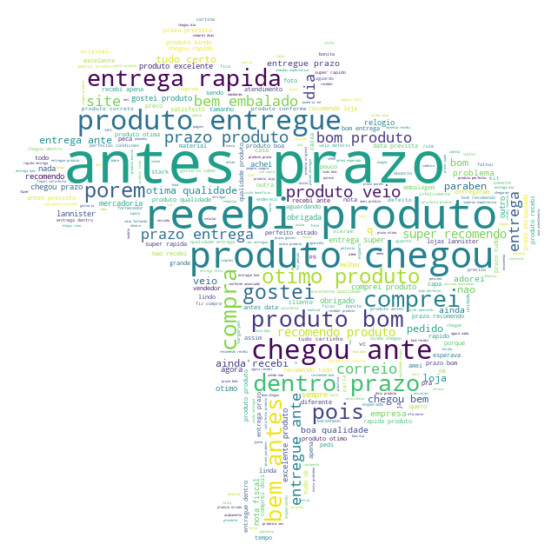

In [88]:
# Transformando coluna preprocessed em uma string unica
text = " ".join([x for x in Reviews['preprocessed']])
# carregando imagem da plotagem
background_image = np.array(Image.open('mask/br2.jpg'))
# atribuindo dados a plotagem 
wordcloud = WordCloud(
                  width=background_image.shape[1],
                  height=background_image.shape[0],
                  background_color="white",
                  mask=background_image,
                  max_font_size=110,
                  max_words=1000,
                  collocations=True
                      ).generate(text)
# configurando layout
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# visualizando
plt.show()